In [1]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Adult/adult.data", header=None)
#data.head()
data.columns = ['age','workclass','fnlwgt','education', 'education-num', 'marital-status','occupation','relationship','race','sex', 'capital-gain','capital-loss','hours-per-week','native-country','income']

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
target = data['income']
data.dropna(axis=0)
data = data.drop(columns=['fnlwgt','education-num','native-country','relationship'])

In [5]:
data.head()
encoded_data = pd.get_dummies(data, columns=['race', 'sex','income'])
print(encoded_data.columns)

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'capital-gain', 'capital-loss', 'hours-per-week',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Female', 'sex_ Male',
       'income_ <=50K', 'income_ >50K'],
      dtype='object')


Now we visualize

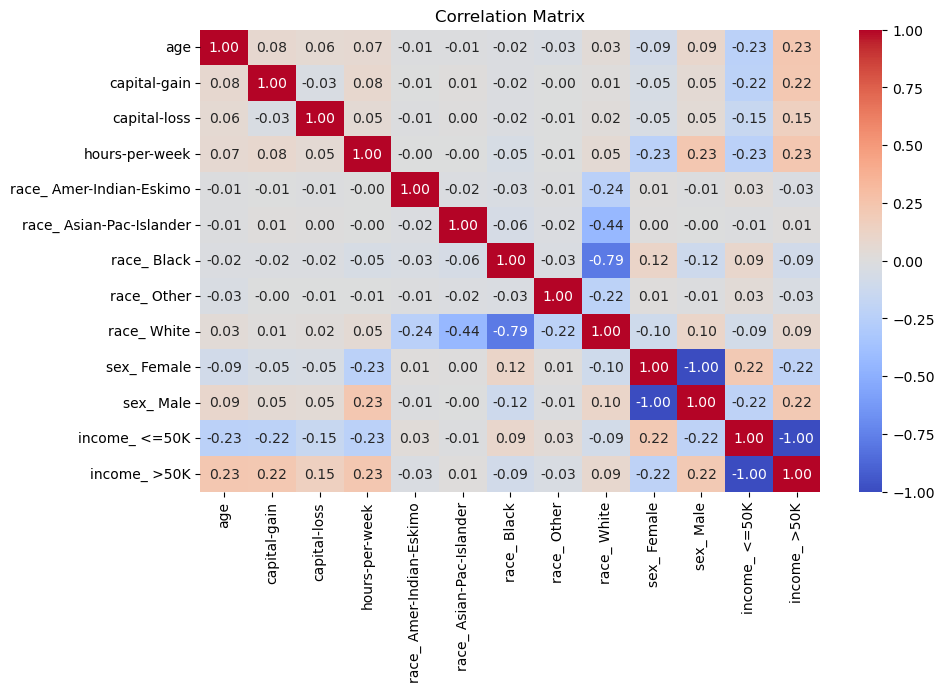

In [7]:
encoded_data = encoded_data.drop(columns=['workclass','education','marital-status','occupation'])
corr_matrix = encoded_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [8]:
data = pd.get_dummies(data)
data.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,2174,0,40,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
1,50,0,0,13,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,True,False
2,38,0,0,40,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,True,False
3,53,0,0,40,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False
4,28,0,0,40,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,True,False


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


target = data['income_ >50K']
features = data.drop(columns=['income_ >50K','income_ <=50K'])

# split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Mean Squared Error (MSE): 0.11625529212939553
R-squared (R2) Score: 0.36482124741447663
Accuracy: 0.8387839705204975


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", knn_accuracy)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Model Accuracy: 0.8441578381698143

KNN Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.91      0.90      4942
        True       0.69      0.64      0.66      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.84      0.84      6513

